In [16]:
# import libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [17]:
# import data
df = pd.read_csv('dataAutOcaz.csv', sep=';')

In [18]:
df.head()


,Unnamed: 0,Marque,Année,Code Postal,Carburant,Emission Co2,Transmission,nbPortes,nbPlace,Kilométrage,Prix
0,0,OPEL,2017,31,Diesel,110-130,Manuelle,5,5,119000,13900
1,1,VOLKSWAGEN,2011,55,Diesel,110-130,Manuelle,5,5,72330,13490
2,2,AUDI,2016,24,Diesel,110-130,Manuelle,5,5,114100,17990
3,3,OPEL,2016,66,Diesel,110-130,Manuelle,5,5,121019,10990
4,4,HONDA,2018,69,Diesel,110-130,Manuelle,5,5,88653,21300


In [19]:
# suppression de la colonne 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

In [20]:
df.head()

,Marque,Année,Code Postal,Carburant,Emission Co2,Transmission,nbPortes,nbPlace,Kilométrage,Prix
0,OPEL,2017,31,Diesel,110-130,Manuelle,5,5,119000,13900
1,VOLKSWAGEN,2011,55,Diesel,110-130,Manuelle,5,5,72330,13490
2,AUDI,2016,24,Diesel,110-130,Manuelle,5,5,114100,17990
3,OPEL,2016,66,Diesel,110-130,Manuelle,5,5,121019,10990
4,HONDA,2018,69,Diesel,110-130,Manuelle,5,5,88653,21300


In [21]:
# description de la dataframe
df.describe()

,Année,Code Postal,nbPortes,nbPlace,Kilométrage,Prix
count,23062.000000,23062.000000,23062.000000,23062.000000,23062.000000,23062.000000
mean,2018.946362,52.082907,4.949527,4.974764,57355.247810,21207.723224
std,2.938603,26.883221,0.313691,0.156846,51649.039998,6860.013482
min,1970.000000,1.000000,3.000000,4.000000,1.000000,2320.000000
25%,2018.000000,31.000000,5.000000,5.000000,15408.000000,16990.000000
50%,2020.000000,54.000000,5.000000,5.000000,44389.500000,20990.000000
75%,2021.000000,77.000000,5.000000,5.000000,86763.000000,25450.000000
max,2023.000000,98.000000,5.000000,5.000000,341620.000000,51590.000000


In [22]:
# affichage des marque par rapport aux code postal
CPMarque = df.groupby('Code Postal').count()['Marque']
CPMarque.sort_values(ascending=False).head(10)

Code Postal
78    876
13    871
31    804
77    804
59    784
33    669
93    640
91    633
69    498
35    494
Name: Marque, dtype: int64

In [23]:
# affichage des Marque par rapport au nbPortes
nbPortesMarque = df.groupby('nbPortes').count()['Marque']
nbPortesMarque.sort_values(ascending=False).head(10)

nbPortes
5    22480
3      582
Name: Marque, dtype: int64

In [24]:
# affichage des Marque par rapport au Carburant
CarburantMarque = df.groupby('Carburant').count()['Marque']
CarburantMarque.sort_values(ascending=False).head(10)

Carburant
Diesel      10166
Essence      9248
Electric     3648
Name: Marque, dtype: int64

In [25]:
# affichage des Marque par rapport au nbPlace
nbPlaceMarque = df.groupby('nbPlace').count()['Marque']
nbPlaceMarque.sort_values(ascending=False).head(10)

nbPlace
5    22480
4      582
Name: Marque, dtype: int64

In [26]:
# afficher le prix moyen par Marque
df.groupby('Marque').mean()['Prix']


Marque
ALFA          17208.823529
AUDI          22461.839286
BMW           23049.854025
BOLLORE       21488.571429
CHEVROLET     22256.428571
CITROEN       21093.043050
CUPRA         36774.000000
DACIA         19743.963776
DAIHATSU      18900.000000
DODGE         20085.000000
DS            22589.859813
FIAT          20322.800202
FORD          20729.679745
HONDA         21045.403509
HYUNDAI       20934.214141
JAGUAR        23253.131579
JEEP          20599.042254
KIA           20504.723810
LANCIA        14145.000000
LAND          26160.858974
LEXUS         21695.250000
MAZDA         21249.265896
MERCEDES      22295.814126
MG            22291.176471
MINI          21486.081374
MITSUBISHI    21293.243243
NISSAN        20074.135783
OPEL          20656.222686
PEUGEOT       22293.704938
PORSCHE       25922.000000
RENAULT       20379.201604
SANTANA       27600.000000
SEAT          20731.945486
SERES         22590.909091
SKODA         21929.882166
SSANGYONG     16159.259259
SUBARU        21123.3

<AxesSubplot:>

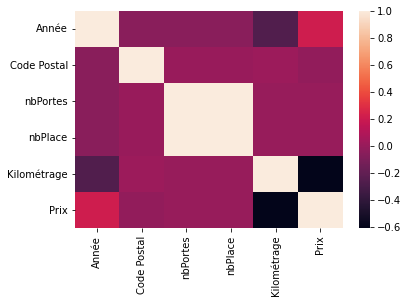

In [27]:
#matrice de correlation
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
            


In [28]:
# encoder les variables catégorielles Marque, Carburant, Transmission, Emission Co2
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit(df[['Marque']])
df['Marque'] = encoder.transform(df[['Marque']]).toarray()
encoder.fit(df[['Carburant']])
df['Carburant'] = encoder.transform(df[['Carburant']]).toarray()
encoder.fit(df[['Transmission']])
df['Transmission'] = encoder.transform(df[['Transmission']]).toarray()
encoder.fit(df[['Emission Co2']])
df['Emission Co2'] = encoder.transform(df[['Emission Co2']]).toarray()


In [29]:
df.head()

,Marque,Année,Code Postal,Carburant,Emission Co2,Transmission,nbPortes,nbPlace,Kilométrage,Prix
0,0.0,2017,31,1.0,0.0,0.0,5,5,119000,13900
1,0.0,2011,55,1.0,0.0,0.0,5,5,72330,13490
2,0.0,2016,24,1.0,0.0,0.0,5,5,114100,17990
3,0.0,2016,66,1.0,0.0,0.0,5,5,121019,10990
4,0.0,2018,69,1.0,0.0,0.0,5,5,88653,21300


In [30]:
# split data
X = df.drop(columns=['Prix'])
y = df['Prix']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(16143, 9) (6919, 9) (16143,) (6919,)


In [31]:
# standardisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
# SVM
from sklearn.svm import SVC 

model = SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 


In [33]:
# affichage des résultats
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion matrix:', confusion_matrix(y_test, y_pred))


Accuracy: 0.0047694753577106515
Confusion matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [34]:
# tester les différents paramètres
from sklearn.model_selection import GridSearchCV

search = GridSearchCV(model,
                        param_grid={'C': [0.1, 1, 10, 100],
                                    'gamma': [0.1, 0.01, 0.001, 0.0001]},
                        scoring='accuracy',
                        cv=5)
search.fit(X_train, y_train)
print('Best parameters:', search.best_params_)
print('Best score:', search.best_score_)

C:\Users\lajaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
